# Décodage d'une formule de pricing

Le challenge consiste à déterminer l’équation ou l’algorithme permettant de calculer les prix d’une couverture d’assurance automobile.

https://www.datascience.net/fr/challenge/26/details

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train data

In [3]:
train = pd.read_csv("data/ech_apprentissage.csv", sep = ';', index_col = 'id', low_memory = False)
X = train.drop('prime_tot_ttc', axis = 1)

print(X.shape)
print(X.head())

(300000, 32)
    annee_naissance  annee_permis   marque  puis_fiscale  anc_veh codepostal  \
id                                                                             
1            1986.0        2006.0  RENAULT             4        1       1034   
2            1986.0        2006.0  RENAULT             8        2       1034   
3            1982.0        2001.0  RENAULT             7        2       1034   
4            1987.0        2006.0    DACIA             5        2       1034   
5            1994.0        2013.0  CITROEN             4        2       1034   

   energie_veh  kmage_annuel  crm                        profession  ...    \
id                                                                   ...     
1          gpl          2924   68  enseignant, formateur, chercheur  ...     
2          gpl         11580   50  enseignant, formateur, chercheur  ...     
3          gpl          7149   95  enseignant, formateur, chercheur  ...     
4          gpl          6526  100  e

## Test data

In [4]:
X_test = pd.read_csv('data/ech_test.csv', sep = ';', index_col = 'id', low_memory = False)

print(X_test.shape)
X_test.head()

(30000, 32)


,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var13,var14,var15,var16,var17,var18,var19,var20,var21,var22
id,,,,,,,,,,,,,,,,,,,,,
300001,1992.0,2011.0,RENAULT,4,2,97109,essence,2983,88,"enseignant, formateur, chercheur",...,3,N,0,1,0,20,2,0,1,0
300002,1991.0,2010.0,RENAULT,6,36,97109,essence,6496,50,"enseignant, formateur, chercheur",...,5,N,0,4,1,20,1,0,1,0
300003,1976.0,1995.0,RENAULT,10,3,97109,essence,6971,50,"enseignant, formateur, chercheur",...,5,N,7,1,1,21,1,0,1,0
300004,1976.0,1995.0,BMW,13,1,97109,essence,7293,68,"enseignant, formateur, chercheur",...,4,N,0,1,1,22,1,0,1,0
300005,1984.0,2004.0,PEUGEOT,9,0,97109,essence,6982,50,"enseignant, formateur, chercheur",...,5,N,2,4,1,16,0,0,1,1


## Target

count    300000.000000
mean        346.063566
std         119.870510
min          94.780000
25%         262.050000
50%         323.220000
75%         407.500000
max        1518.810000
Name: prime_tot_ttc, dtype: float64


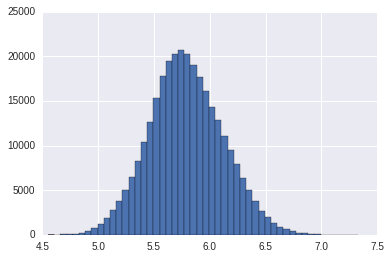

In [5]:
y = train.prime_tot_ttc

print(y.describe())
np.log(y).hist(bins=50);

## Features


* [annee_naissance](#annee_naissance)
* [annee_permis](#annee_permis)
* [marque](#marque)
* [puis_fiscale](#puis_fiscale)
* [anc_veh](#anc_veh)
* [codepostal](#codepostal)
* [energie_veh](#energie_veh)
* [kmage_annuel](#kmage_annuel)
* [crm](#crm)
* [profession](#profession)
* [var1](#var1)
* [var2](#var2)
* [var3](#var3)
* [var4](#var4)
* [var5](#var5)
* [var6](#var6)
* [var7](#var7)
* [var8](#var8)
* [var9](#var9)
* [var10](#var10)
* [var11](#var11)
* [var12](#var12)
* [var13](#var13)
* [var14](#var14)
* [var15](#var15)
* [var16](#var16)
* [var17](#var17)
* [var18](#var18)
* [var19](#var19)
* [var20](#var20)
* [var21](#var21)
* [var22](#var22)
* [age_permis](#age_permis)

In [7]:
df = pd.concat([X, X_test], axis=0)

In [8]:
df.dtypes

annee_naissance    float64
annee_permis       float64
marque              object
puis_fiscale         int64
anc_veh              int64
codepostal          object
energie_veh         object
kmage_annuel         int64
crm                  int64
profession          object
var1               float64
var2                 int64
var3                 int64
var4                 int64
var5                 int64
var6                object
var7                object
var8                object
var9                 int64
var10                int64
var11                int64
var12                int64
var13                int64
var14               object
var15                int64
var16               object
var17                int64
var18                int64
var19                int64
var20                int64
var21                int64
var22                int64
dtype: object

In [9]:
cat_variables = [i for i in df.columns if df[i].dtype == 'O']

In [11]:
print(cat_variables)

['marque', 'codepostal', 'energie_veh', 'profession', 'var6', 'var7', 'var8', 'var14', 'var16']


### `annee_naissance`

Год рождения.

In [22]:
df.annee_naissance.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    329693.000000
mean       1983.684949
std           6.563537
min        1925.000000
25%                NaN
50%                NaN
75%                NaN
max        1998.000000
Name: annee_naissance, dtype: float64

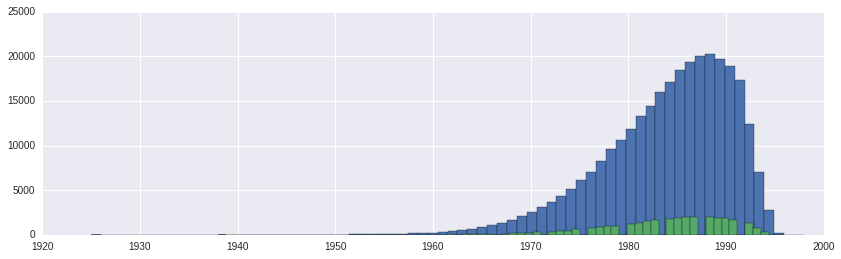

In [24]:
# X.groupby(['annee_naissance'])['annee_naissance'].count()
plt.figure(figsize=(14, 4))
X.annee_naissance.hist(bins = 72);
X_test.annee_naissance.hist(bins = 72);

### `annee_permis`

Год получения прав.

In [25]:
df.annee_permis.describe()

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    329693.000000
mean       2003.050847
std           6.590561
min        1944.000000
25%                NaN
50%                NaN
75%                NaN
max        2018.000000
Name: annee_permis, dtype: float64

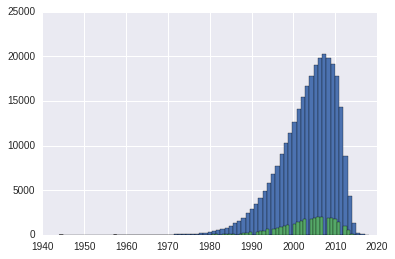

In [26]:
# X.groupby(['annee_permis'])['annee_permis'].count()
X.annee_permis.hist(bins = 73);
X_test.annee_permis.hist(bins = 73);

### `age_permis`

Добавим фичу `age_permis` — возраст, в котором были получены права.

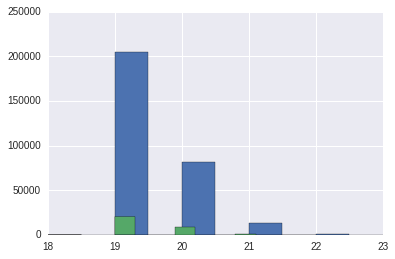

In [14]:
X['age_permis'] = X.annee_permis - X.annee_naissance
X.age_permis.hist();

X_test['age_permis'] = X_test.annee_permis - X_test.annee_naissance
X_test.age_permis.hist();

### `marque`

RENAULT              73371
PEUGEOT              51202
CITROEN              35086
VOLKSWAGEN           20023
OPEL                 13343
FORD                 13135
FIAT                 11316
TOYOTA                8944
MERCEDES              7621
NISSAN                6773
BMW                   6296
AUDI                  5603
SEAT                  4615
VOLVO                 3381
SUZUKI                3205
HONDA                 3144
DACIA                 2446
LAND-ROVER            2340
MITSUBISHI            2332
SKODA                 2224
ALFA ROMEO            2079
HYUNDAI               2034
MAZDA                 1947
MINI                  1689
ROVER                 1579
JEEP                  1356
SAAB                  1343
KIA                   1230
CHRYSLER              1206
LANCIA                1020
                     ...  
WIESMANN                 2
OLDSMOBILE               2
RAYTON FISSORE           2
JIDE                     2
SALMSON                  2
SMS                      2
N

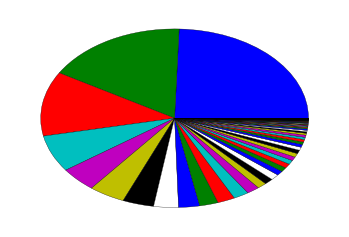

In [15]:
print(X.marque.value_counts())
plt.pie(X.marque.value_counts());

In [16]:
np.sort(X.marque.unique())

array(['ACMA', 'ALFA ROMEO', 'ALPINE RENAULT', 'AMC', 'AMPHICAR', 'ARO',
       'ASIA', 'ASTON MARTIN', 'AUDI', 'AUSTIN', 'AUSTIN-HEALEY',
       'AUTO-UNION', 'AUTOBIANCHI', 'AUTOLAND', 'AUVERLAND', 'BEDFORD',
       'BENTLEY', 'BERTONE', 'BMW', 'BREMACH', 'BRM', 'BUICK', 'CADILLAC',
       'CARBODIES', 'CATERHAM', 'CHENARD ET WALKER', 'CHEVROLET',
       'CHEYENNE', 'CHRYSLER', 'CITROEN', 'COURNIL', 'DACIA', 'DAEWOO',
       'DAF', 'DAIHATSU', 'DAIMLER', 'DANGEL', 'DATSUN', 'DE LOREAN',
       'DELAHAYE', 'DETHLEFFS', 'DODGE', 'DONKERVOORT', 'EAGLE', 'EBRO',
       'EBS', 'ENGIN LOISIRS', 'ENGIN SPECIAL', 'ENGIN TRAVAUX PUBLIC',
       'FERRARI', 'FIAT', 'FORD', 'FSO', 'GMC', 'GME', 'GRANDIN',
       'HANOMAG', 'HONDA', 'HOTCHKISS', 'HUMMER', 'HYUNDAI', 'INFINITI',
       'INTERNATIONAL', 'ISUZU', 'IVECO', 'JAGUAR', 'JEEP', 'JIDE', 'KIA',
       'LADA', 'LAFER', 'LAMBORGHINI', 'LANCIA', 'LAND-ROVER', 'LDV',
       'LEXUS', 'LINCOLN', 'LOHR', 'LORENZ', 'LOTUS', 'MAHINDRA', 'MARTIN',
 

### `puis_fiscale`

Налоговая ставка (на мощность двигателя машины).

count    300000.000000
mean          6.825267
std           2.650280
min           0.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          58.000000
Name: puis_fiscale, dtype: float64


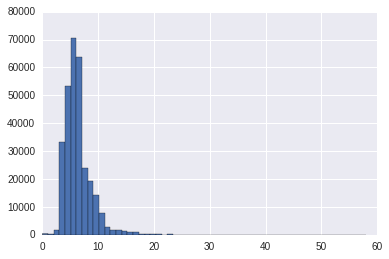

In [17]:
print(X.puis_fiscale.describe())
X.puis_fiscale.hist(bins = 57);

In [19]:
X[X.puis_fiscale > 50]

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var14,var15,var16,var17,var18,var19,var20,var21,var22,age_permis
id,,,,,,,,,,,,,,,,,,,,,
47565,1944.0,1963.0,BENTLEY,51,4,14174,essence,14418,50,"enseignant, formateur, chercheur",...,F,0,1,3,31,2,1,1,0,19.0
74678,1933.0,1952.0,BENTLEY,54,1,24465,essence,17000,55,"enseignant, formateur, chercheur",...,F,0,1,2,22,0,0,1,1,19.0
162064,1932.0,1951.0,BENTLEY,51,1,54482,essence,14418,50,"agent, employe",...,B,3,1,1,29,0,0,0,2,19.0
182182,1936.0,1955.0,FERRARI,58,40,62498,essence,12296,50,profession liberale,...,A,2,4,1,23,0,0,1,3,19.0
220841,1937.0,1956.0,AUDI,51,34,75109,essence,13366,50,"cadre, ingenieur",...,G,2,4,4,24,0,1,0,3,19.0
240427,1925.0,1944.0,FERRARI,58,4,78650,essence,12296,50,"enseignant, formateur, chercheur",...,G,0,1,1,15,0,1,1,1,19.0
254274,1947.0,1967.0,BENTLEY,51,2,83137,essence,14418,50,"enseignant, formateur, chercheur",...,A,0,1,2,23,0,1,1,1,20.0
279724,1942.0,1961.0,BENTLEY,51,2,92051,essence,14543,50,"enseignant, formateur, chercheur",...,G,1,1,2,21,0,0,1,2,19.0
299719,1943.0,1963.0,ROLLS ROYCE,53,3,97107,essence,14954,50,"enseignant, formateur, chercheur",...,N,0,1,1,20,0,1,1,1,20.0


### `anc_veh`

count    300000.000000
mean         16.362950
std          24.769884
min           0.000000
25%           1.000000
50%           2.000000
75%          32.000000
max          99.000000
Name: anc_veh, dtype: float64


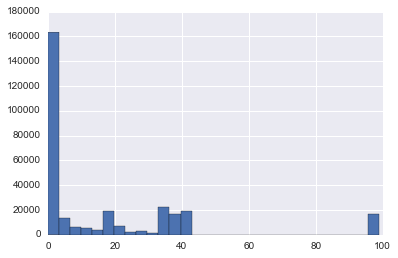

In [14]:
print(X.anc_veh.describe())
X.anc_veh.hist(bins = 30);

### `codepostal`

Почтовый индекс.

In [15]:
X.codepostal.value_counts()#.head()

13001    2606
6088     2295
31555    2275
35238    1992
20004    1932
44109    1852
97101    1654
34172    1629
1034     1402
67482    1381
13208    1351
87085    1194
38185    1174
33063    1108
97103    1083
13209    1067
20033    1045
29019     980
72181     959
13212     949
49007     926
13213     917
79191     870
54395     863
30189     829
63113     829
83137     805
37261     778
75115     772
80021     770
         ... 
62591       1
60379       1
80761       1
31089       1
34045       1
17473       1
5135        1
45121       1
85196       1
52444       1
58216       1
69077       1
67112       1
82145       1
52036       1
2119        1
54350       1
69012       1
31393       1
89128       1
39076       1
71265       1
12188       1
32042       1
27611       1
90020       1
63094       1
50549       1
78344       1
91098       1
Name: codepostal, dtype: int64

In [16]:
X_test.codepostal.value_counts()

1034     9723
97411    2820
97415    1965
97422    1520
97416    1405
97113    1074
97118     845
97128     729
97413     617
97117     570
97120     561
97414     509
97418     507
97408     506
97125     506
97409     502
97115     495
97129     448
97412     418
97116     404
97404     378
97410     352
97401     311
97124     262
97420     257
97407     218
97114     215
97132     205
97402     202
97405     198
97119     141
97121     134
97111     108
97134     108
97122     107
97112      86
97406      84
97403      77
97423      76
97424      68
97419      55
97109      49
97421      49
97133      43
97417      40
97110      21
97126      18
97131       7
97130       5
97107       2
Name: codepostal, dtype: int64

In [17]:
cat_variables.append('codepostal')

### `energie_veh`

* перевести в factor

gazole             165401
essence            126025
gpl                  7058
hybride essence       803
NR                    413
electricite           300
Name: energie_veh, dtype: int64


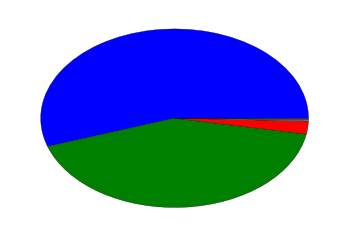

In [18]:
print(X.energie_veh.value_counts())
plt.pie(X.energie_veh.value_counts());

In [19]:
cat_variables.append('energie_veh')

### `kmage_annuel`

Километраж в год.

* кластеризовать (сделать новую переменную)

count    300000.000000
mean       7359.745500
std        3085.865577
min         282.000000
25%        6387.000000
50%        6928.000000
75%        7464.000000
max       17000.000000
Name: kmage_annuel, dtype: float64


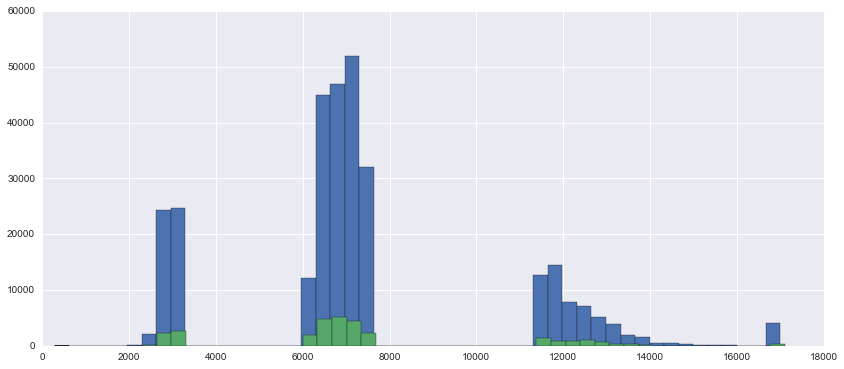

In [77]:
print(X.kmage_annuel.describe())
plt.figure(figsize=(14, 6));
X.kmage_annuel.hist(bins = 50);
X_test.kmage_annuel.hist(bins = 50);

In [21]:
from sklearn import cluster

In [22]:
kmage_annuel = pd.DataFrame(X['kmage_annuel'])

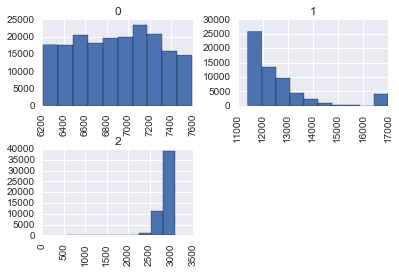

In [23]:
km_3 = cluster.KMeans(n_clusters=3)
km_3.fit(kmage_annuel)

kmage_annuel.hist(by=km_3.labels_);

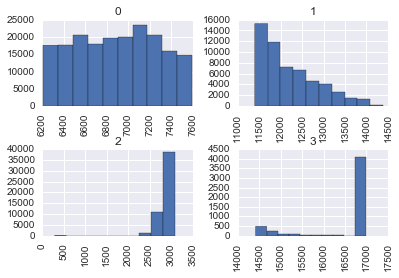

In [24]:
km_4 = cluster.KMeans(n_clusters=4)
km_4.fit(kmage_annuel)

kmage_annuel.hist(by=km_4.labels_);

### `crm`

count    300000.000000
mean         73.551957
std          23.699505
min          50.000000
25%          50.000000
50%          68.000000
75%          95.000000
max         270.000000
Name: crm, dtype: float64


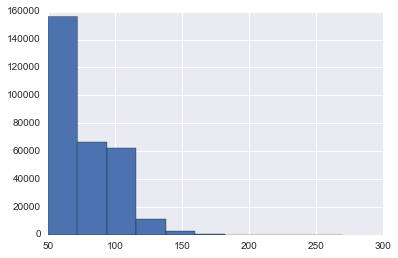

In [25]:
print(X.crm.describe())
X.crm.hist();
# np.log(X.crm).hist();

In [26]:
# X.crm.value_counts()

### `profession`

* перевести в factor

Профессии:

* преподаватель, тренер, исследователь
* агент, сотрудник
* рамки, инженер
* техник
* педагог, ведущий, монитор
* Либеральная профессия
* работник
* работоискатель
* студент
* ремесленник
* профессия в области искусств и развлечений
* мужчина или женщина, у себя дома
* КоммерсантЪ
* Промежуточное профессия здравоохранения и социальной работы в 
* Лидер бизнеса
* Форман, мастерство агент
* оператор фермер

In [27]:
X.profession.value_counts()

enseignant, formateur, chercheur                             110354
agent, employe                                                74960
cadre, ingenieur                                              31471
technicien                                                    15624
educateur, animateur, moniteur                                13273
profession liberale                                           10424
ouvrier                                                        9542
demandeur d'emploi                                             6498
etudiant                                                       5829
artisan                                                        4852
profession de l'information des arts et des spectacles         4831
homme ou femme au foyer                                        4631
commercant                                                     2610
profession intermediaire de la sante et du travail social      2215
chef d'entreprise                               

In [28]:
cat_variables.append('profession')

### `var1`

Судя по всему, стаж вождения.

In [30]:
# pd.DataFrame([X.annee_naissance, X.age_permis, X.var1]).transpose()

In [31]:
# X.var1.isnull().sum()

# var1 = X.var1.fillna(0)

# X[var1 == 0]

# y[var1 == 0]

### `var2`

In [32]:
print(X.var2.isnull().sum())
print(X.var2.value_counts())

0
4    66132
1    64146
5    55494
3    55430
2    53532
0     5266
Name: var2, dtype: int64


### `var3`

In [33]:
print(X.var3.isnull().sum())
print(X.var3.value_counts())

0
372    169434
272    130566
Name: var3, dtype: int64


### `var4`

In [34]:
print(X.var4.isnull().sum())
print(X.var4.value_counts())

0
0    139795
1     56047
2     55355
3     22344
5      8677
4      8672
7      3542
6      3452
9      1591
8       525
Name: var4, dtype: int64


### `var5`

In [35]:
print(X.var5.isnull().sum())
print(X.var5.value_counts())

0
1    173974
2    126026
Name: var5, dtype: int64


### `var6`

In [36]:
print(X.var6.isnull().sum())
print(X.var6.value_counts())

0
B    115658
A     88583
C     77203
D     17978
N       578
Name: var6, dtype: int64


In [37]:
cat_variables.append('var6')

### `var7`

In [38]:
print(X.var7.isnull().sum())
print(X.var7.value_counts())

0
1     153064
3      34266
10     21388
11     19648
4      13729
5      12237
7       9630
8       8364
20      8184
2       7947
6       4670
14      2169
12      1742
13      1522
9        836
0        308
NR       290
50         5
30         1
Name: var7, dtype: int64


In [39]:
cat_variables.append('var7')

In [40]:
print(cat_variables)

['marque', 'codepostal', 'energie_veh', 'profession', 'var6', 'var7']


### `var8`

In [41]:
print(X.var8.isnull().sum())
print(X.var8.value_counts())

0
M1    91826
B2    66389
M2    54018
H1    25042
B1    23369
T3     7565
T2     6525
F      5357
K      3947
T4     2710
T1     2569
MC     2208
K2     2124
VA     1529
H2     1438
PU     1211
P3     1202
NR      586
TU      348
P2       16
P1       14
P4        5
K3        1
B         1
Name: var8, dtype: int64


In [42]:
cat_variables.append('var8')

### `var9`

In [43]:
print(X.var9.isnull().sum())
print(X.var9.value_counts().head())

0
90     28257
60     17286
110    17199
75     17165
115    10933
Name: var9, dtype: int64


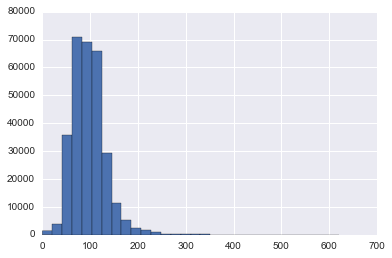

In [44]:
X.var9.hist(bins = 30);

### `var10`

In [45]:
print(X.var10.isnull().sum())
print(X.var10.value_counts().head())

0
180    15769
170    12194
185    11967
175    11745
160    10974
Name: var10, dtype: int64


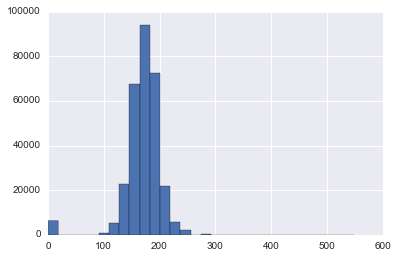

In [46]:
X.var10.hist(bins=30);

### `var11`

In [47]:
print(X.var11.isnull().sum())
print(X.var11.value_counts().head())

0
0     63845
2     49587
1     44320
99    16958
34    14497
Name: var11, dtype: int64


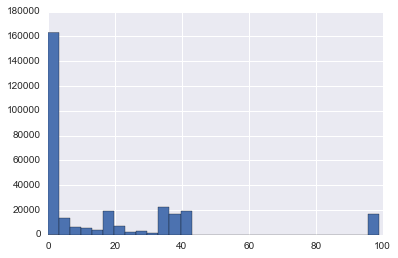

In [48]:
X.var11.hist(bins=30);

### `var12`

In [49]:
print(X.var12.isnull().sum())
print(X.var12.value_counts().head())

0
3211    4121
960     3512
890     3484
980     3384
1300    3224
Name: var12, dtype: int64


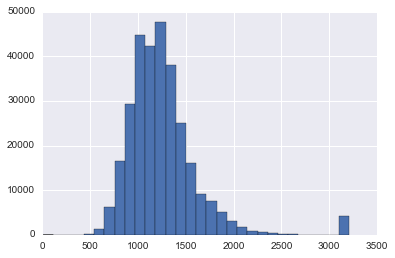

In [50]:
X.var12.hist(bins = 30);

### `var13`

In [51]:
print(X.var13.isnull().sum())
print(X.var13.value_counts())

0
5    180716
3     69632
4     29832
2     19820
Name: var13, dtype: int64


### `var14`

In [52]:
print(X.var14.isnull().sum())
print(X.var14.value_counts())

0
A    62469
B    62449
F    46276
G    45126
C    34351
D    32757
E    11505
N     5067
Name: var14, dtype: int64


In [53]:
cat_variables.append('var14')

### `var15`

In [54]:
print(X.var15.isnull().sum())
print(X.var15.value_counts())

0
0    107347
2     98212
1     55596
3     29408
4      6985
5      1662
6       537
7       147
8        78
9        28
Name: var15, dtype: int64


### `var16`

In [55]:
print(X.var16.isnull().sum())
print(X.var16.value_counts())

0
1     157270
4      99301
5      16958
3      16880
2       5917
0       3345
NR       329
Name: var16, dtype: int64


In [56]:
cat_variables.append('var16')

### `var17`

In [57]:
print(X.var17.isnull().sum())
print(X.var17.value_counts())

0
1    189634
2     69401
4     31959
3      7062
0      1789
5       155
Name: var17, dtype: int64


### `var18`

In [58]:
print(X.var18.isnull().sum())
print(X.var18.value_counts())

0
23    36281
22    34870
24    33843
25    29404
21    28001
26    25553
27    20606
28    15433
20    15372
29    11151
30     7953
31     6451
19     5720
32     4956
33     3925
34     3132
35     2401
36     1933
37     1724
38     1517
39     1155
14      797
13      756
15      675
12      644
40      572
16      551
11      545
18      480
17      472
10      433
9       348
8       289
41      281
7       273
4       241
5       230
6       230
3       193
1       150
2       144
42      132
0        90
43       55
44       31
45        7
Name: var18, dtype: int64


### `var19`

In [59]:
print(X.var19.isnull().sum())
print(X.var19.value_counts())

0
0     210146
1      47692
2      24855
3      10148
4       3978
5       1537
6        662
7        362
8        237
9        125
11        63
10        47
12        32
13        27
15        16
14        15
16        14
20        14
17         9
18         6
19         3
27         3
25         2
34         2
32         1
21         1
23         1
24         1
28         1
Name: var19, dtype: int64


### `var20`

In [60]:
print(X.var20.isnull().sum())
print(X.var20.value_counts())

0
1    162846
0    137154
Name: var20, dtype: int64


### `var21`

In [61]:
print(X.var21.isnull().sum())
print(X.var21.value_counts())

0
1    273577
0     26423
Name: var21, dtype: int64


### `var22`

In [62]:
print(X.var22.isnull().sum())
print(X.var22.value_counts())

0
0     112575
1      93220
2      57902
3      23126
4       7954
5       2930
6       1155
7        484
8        248
9        146
10       101
11        44
13        35
12        28
14        19
15         8
17         8
22         4
25         3
60         3
18         2
30         2
59         1
16         1
20         1
Name: var22, dtype: int64


-----

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
encods = [LabelEncoder() for col in cat_variables]

for i, col in enumerate(cat_variables):
    X[col] = encods[i].fit_transform(X[col].astype(str))

encods = [LabelEncoder() for col in cat_variables]

for i, col in enumerate(cat_variables):
    X_test[col] = encods[i].fit_transform(X_test[col].astype(str))

In [66]:
X.fillna(0, inplace = True)
X_test.fillna(0, inplace = True)

---------

Зафигачить `xgboost`.

```python
import xgboost as xgb
# read in data
dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
num_round = 2
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)
```

In [67]:
import xgboost as xgb

In [68]:
dtrain = xgb.DMatrix(X, y, missing=0)

dtest = xgb.DMatrix(X_test)

In [69]:
# человеческая метрика
def mape2(preds, dtrain):
    y_true = dtrain.get_label()
    return 'mape2', np.mean(np.abs((y_true - preds) / y_true))

In [70]:
param = { }
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [71]:
pred = bst.predict(dtest)

In [72]:
from datetime import datetime

filename = 'xgb_' + datetime.now().strftime(format = '%d%m_%H%M') + '.csv'
pd.DataFrame({'id': X_test.index, 'pred': pred}).to_csv(filename,
                                                        index=False,
                                                        sep=';')

In [73]:
# xgb.cv(params = param, 
#        dtrain = dtrain, 
#        num_boost_round=num_round, 
#        early_stopping_rounds = 30,
#        feval = mape2
#       )

In [78]:
X.corr()

,annee_naissance,annee_permis,marque,puis_fiscale,anc_veh,codepostal,energie_veh,kmage_annuel,crm,profession,...,var14,var15,var16,var17,var18,var19,var20,var21,var22,age_permis
annee_naissance,1.000000,0.999957,-0.003007,0.037407,0.006849,-0.004392,0.147210,-0.120363,0.031002,-0.004574,...,-0.000891,0.001751,0.006076,0.001574,0.000475,-0.000976,-0.000251,-0.001690,0.000799,0.717313
annee_permis,0.999957,1.000000,-0.003043,0.037803,0.006859,-0.004362,0.147174,-0.120146,0.030939,-0.004564,...,-0.000868,0.001745,0.006121,0.001581,0.000441,-0.000976,-0.000219,-0.001714,0.000804,0.723754
marque,-0.003007,-0.003043,1.000000,-0.066060,0.011006,0.000399,-0.005366,-0.030423,0.043682,-0.007426,...,-0.001518,0.009779,0.012735,-0.001312,0.000772,-0.000475,0.001927,-0.001399,-0.005618,-0.004918
puis_fiscale,0.037407,0.037803,-0.066060,1.000000,-0.045425,0.027230,-0.061505,0.544390,-0.220898,0.034894,...,0.032008,0.019341,-0.014510,0.000972,-0.005158,-0.002424,-0.001528,-0.005166,-0.001318,0.056665
anc_veh,0.006849,0.006859,0.011006,-0.045425,1.000000,-0.008419,0.012018,-0.043351,0.197217,-0.022601,...,-0.037633,-0.085359,0.634972,-0.007347,-0.000244,-0.000791,0.006100,0.001245,0.002601,0.005722
codepostal,-0.004392,-0.004362,0.000399,0.027230,-0.008419,1.000000,-0.027410,0.015804,0.040679,-0.018366,...,0.384664,0.013155,0.015633,0.096410,-0.343083,-0.018654,-0.096769,-0.063687,-0.069443,-0.000948
energie_veh,0.147210,0.147174,-0.005366,-0.061505,0.012018,-0.027410,1.000000,0.249167,-0.031907,-0.006406,...,-0.002145,0.010658,0.018611,0.003524,0.007814,0.002714,0.007790,0.004190,0.004910,0.103432
kmage_annuel,-0.120363,-0.120146,-0.030423,0.544390,-0.043351,0.015804,0.249167,1.000000,-0.226800,0.034286,...,0.021486,0.054572,-0.012715,-0.000471,-0.005435,0.000691,0.002975,-0.002461,-0.000159,-0.070413
crm,0.031002,0.030939,0.043682,-0.220898,0.197217,0.040679,-0.031907,-0.226800,1.000000,-0.068545,...,0.009651,-0.007315,0.134523,0.004029,-0.020380,-0.000053,-0.000457,0.001444,-0.005481,0.017587
profession,-0.004574,-0.004564,-0.007426,0.034894,-0.022601,-0.018366,-0.006406,0.034286,-0.068545,1.000000,...,-0.001496,0.021835,-0.072695,-0.002334,0.009562,-0.000777,0.001498,0.005965,0.004280,-0.002490


In [79]:
X.corrwith(y)

annee_naissance    0.053629
annee_permis       0.053594
marque             0.056387
puis_fiscale      -0.087858
anc_veh           -0.113175
codepostal         0.038251
energie_veh        0.067854
kmage_annuel       0.017368
crm                0.672603
profession         0.018608
var1              -0.158137
var2               0.082028
var3               0.070001
var4               0.137481
var5              -0.164251
var6              -0.014386
var7              -0.061064
var8               0.006371
var9              -0.017677
var10              0.095162
var11             -0.112625
var12             -0.055526
var13              0.051978
var14              0.016385
var15              0.027815
var16             -0.058579
var17              0.005639
var18             -0.008995
var19             -0.003160
var20              0.001241
var21              0.000776
var22             -0.002512
age_permis         0.036013
dtype: float64